In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/AI_HACKATHON_NEWBEES'

/content/drive/.shortcut-targets-by-id/1-4ii3uVRlACOP48-FWHqr-aYnpn7FvB0/AI_HACKATHON_NEWBEES


In [3]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import dlib
import os

In [ ]:
len(glob('/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/train_crop_align_2/*'))

15208

In [4]:
data_dir = '/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/'

In [5]:
dir_img_train = glob('/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/train_crop_align_2/*.jpg')

In [ ]:
if '/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/train_crop_align/image_2209.jpg' in dir_img_train:
    print("exist")
else:
    print("not exist")

exist


In [6]:
img_train_list = [os.path.basename(file_path) for file_path in dir_img_train]

In [7]:
len(img_train_list)

14828

In [8]:
single_label = pd.read_csv(data_dir + 'single_label_all.csv')
train_label = single_label[single_label['file_name'].isin(img_train_list)]
train_label

,Unnamed: 0,file_name,height,width,bbox,age,race,masked,skintone,emotion,gender
0,0,100013282.jpg,1333,2000,"[934.0000000000097, 144.82228672769534, 238.24...",20-30s,Caucasian,unmasked,mid-light,Neutral,Male
1,1,100016175.jpg,1333,2000,"[1094.0513571635438, 422.91772295627203, 55.45...",20-30s,Caucasian,unmasked,light,Neutral,Male
2,2,10004189.jpg,2000,1333,"[419.93871061403877, 269.1250391680045, 377.19...",20-30s,Mongoloid,unmasked,light,Happiness,Female
3,3,100104575.jpg,1333,2000,"[1490.6909678848915, 676.0000000000097, 37.553...",20-30s,Caucasian,unmasked,mid-light,Neutral,Male
4,4,100104600.jpg,2000,1333,"[549.169724453414, 92.52040334013152, 306.8821...",20-30s,Caucasian,unmasked,mid-light,Happiness,Female
...,...,...,...,...,...,...,...,...,...,...,...
14886,15305,image_2713.jpg,1024,1024,"[244.71717171717162, 176.66666666666654, 587.2...",40-50s,Caucasian,unmasked,mid-light,Happiness,Male
14887,15306,image_3332.jpg,1024,1024,"[265.6338028169031, 174.2441314553992, 584.727...",Senior,Caucasian,unmasked,light,Happiness,Female
14888,15307,image_6905.jpg,1024,1024,"[251.3434343434343, 184.7171717171712, 500.535...",20-30s,Caucasian,unmasked,light,Neutral,Male
14889,15308,image_4080.jpg,1024,1024,"[222.72727272727235, 179.8181818181809, 586.90...",Kid,Caucasian,unmasked,light,Happiness,Female


In [9]:
train_label['emotion'].value_counts()

Happiness    9013
Neutral      4645
Sadness       366
Anger         297
Surprise      281
Disgust       125
Fear          101
Name: emotion, dtype: int64

In [ ]:
len(glob('/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/gender_data/Female/*.jpg'))

0

# Creat folder to split data

In [10]:
data_crop_dir = data_dir + 'train_crop_align_2/'

In [ ]:
# import shutil

# male_folder = data_dir + 'gender_data/Male'
# female_folder = data_dir + 'gender_data/Female'

# os.makedirs(male_folder)
# os.makedirs(female_folder)

# for index, row in single_label.iterrows():
#     file_name = data_crop_dir + row['file_name']

#     gender = row['gender']
#     if gender == 'Male':
#         shutil.copy(file_name, os.path.join(male_folder, os.path.basename(file_name)))
#     elif gender == 'Female':
#         shutil.copy(file_name, os.path.join(female_folder, os.path.basename(file_name)))

In [ ]:
# caucasian_folder = data_dir + 'race_data/Caucasian'
# mongoloi_folder = data_dir + 'race_data/Mongoloid'
# negroid_folder = data_dir + 'race_data/Negroid'

# os.makedirs(caucasian_folder)
# os.makedirs(mongoloi_folder)
# os.makedirs(negroid_folder)

# for index, row in single_label.iterrows():
#     file_name = data_crop_dir + row['file_name']

#     race = row['race']
#     if race == 'Caucasian':
#         shutil.copy(file_name, os.path.join(caucasian_folder, os.path.basename(file_name)))
#     elif race == 'Mongoloid':
#         shutil.copy(file_name, os.path.join(mongoloi_folder, os.path.basename(file_name)))
#     elif race == 'Negroid':
#         shutil.copy(file_name, os.path.join(negroid_folder, os.path.basename(file_name)))

In [ ]:
# baby_folder = data_dir + 'age_data/Baby'
# kid_folder = data_dir +'age_data/Kid'
# teen_folder = data_dir +'age_data/Teenager'
# _2030_folder = data_dir +'age_data/20-30s'
# _4050_folder = data_dir +'age_data/40-50s'
# senior_folder = data_dir + 'age_data/Senior'

# os.makedirs(baby_folder)
# os.makedirs(kid_folder)
# os.makedirs(teen_folder)
# os.makedirs(_2030_folder)
# os.makedirs(_4050_folder)
# os.makedirs(senior_folder)


# for index, row in single_label.iterrows():
#     file_name = data_crop_dir + row['file_name']
#     age = row['age']

#     if age == 'Baby':
#         shutil.copy(file_name, os.path.join(baby_folder, os.path.basename(file_name)))
#     elif age == 'Kid':
#         shutil.copy(file_name, os.path.join(kid_folder, os.path.basename(file_name)))
#     elif age == 'Teenager':
#         shutil.copy(file_name, os.path.join(teen_folder, os.path.basename(file_name)))
#     elif age == '20-30s':
#         shutil.copy(file_name, os.path.join(_2030_folder, os.path.basename(file_name)))
#     elif age == '40-50s':
#         shutil.copy(file_name, os.path.join(_4050_folder, os.path.basename(file_name)))
#     elif age == 'Senior':
#         shutil.copy(file_name, os.path.join(senior_folder, os.path.basename(file_name)))

# Emotion Prediction

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras import utils
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

from keras.regularizers import l2

##Define Emotion Classes

In [12]:
def class_labels_reassign(emo):

    if emo == 'Happiness':
        return 0
    elif emo == 'Neutral':
        return 1
    elif emo == 'Anger':
        return 2
    elif emo == 'Sadness':
        return 3
    elif emo == 'Surprise':
        return 4
    elif emo == 'Disgust':
        return 5
    elif emo == 'Fear':
        return 6

In [14]:
emo_df = pd.DataFrame()
emo_df['file_name'] = train_label['file_name']
emo_df['emotion'] = train_label['emotion']

In [16]:
emo_df['target'] = emo_df['emotion'].map(class_labels_reassign)
emo_df['target'].value_counts()

0    9013
1    4645
3     366
2     297
4     281
5     125
6     101
Name: target, dtype: int64

# Prepare Dataset

In [17]:
X = emo_df['file_name'].to_list()
y = emo_df['target'].to_list()

In [18]:
X = [data_crop_dir + file_name for file_name in X]

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

In [20]:
X_train_tensor = tf.constant(X_train)
y_train_tensor = tf.constant(y_train)

X_val_tensor = tf.constant(X_val)
y_val_tensor = tf.constant(y_val)

In [22]:
# Image Gray scale
num_classes = 7

def _parse_function(filename, label):

    image_string = tf.io.read_file(filename)
    image_decoded = tf.io.decode_jpeg(image_string, channels=3)    # channels=1 to convert to grayscale, channels=3 to convert to RGB.
    # image_resized = tf.image.resize(image_decoded, [200, 200])

    # image_normalized = tf.cast(image_decoded, tf.float32) / 255.0

    label = tf.one_hot(label, num_classes)

    return image_decoded, label

In [23]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tensor, y_train_tensor))
train_dataset = train_dataset.map(_parse_function)

train_dataset = train_dataset.batch(64)    # Same as batch_size hyperparameter in model.fit() below.

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_tensor, y_val_tensor))
val_dataset = val_dataset.map(_parse_function)

val_dataset = val_dataset.batch(64)

# Model

In [24]:
import keras.layers
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [32]:
x = Flatten()(vgg16.output)

x=Dense(1024,activation="relu",kernel_regularizer=l2(0.001))(x)
x=Dropout(0.5)(x)

x=Dense(256,activation="relu",kernel_regularizer=l2(0.001))(x)
x=Dropout(0.5)(x)

prediction = Dense(7, activation='softmax')(x)

for layer in vgg16.layers:
    layer.trainable = False

In [33]:
model = keras.Model(inputs=vgg16.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [ ]:
#optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)

In [27]:
tensorboard = TensorBoard(log_dir=f"/content/drive/MyDrive/AI_HACKATHON_NEWBEES/Log_Output/age_model")

In [28]:
checkpoint = ModelCheckpoint(filepath=f"/content/drive/MyDrive/AI_HACKATHON_NEWBEES/Log_Output/emotion_model/emotion_vgg19_checkpoint.h5",
                             monitor='val_accuracy',
                             save_best_only=True,
                             save_weights_only=False,
                             verbose=1
                            )

In [29]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model

In [35]:
model_history = model.fit(train_dataset,
                          batch_size=64,
                          validation_data=val_dataset,
                          epochs=30,
                          callbacks=[tensorboard, checkpoint, early_stop],
                          shuffle=False    # shuffle=False to reduce randomness and increase reproducibility
                          )

Epoch 1/30
186/186 [==============================] - ETA: 0s - loss: 13.0480 - accuracy: 0.5542
Epoch 1: val_accuracy improved from -inf to 0.60081, saving model to /content/drive/MyDrive/AI_HACKATHON_NEWBEES/Log_Output/emotion_model/emotion_vgg19_checkpoint.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


186/186 [==============================] - 376s 2s/step - loss: 13.0480 - accuracy: 0.5542 - val_loss: 3.6713 - val_accuracy: 0.6008
Epoch 2/30
186/186 [==============================] - ETA: 0s - loss: 3.6158 - accuracy: 0.6243
Epoch 2: val_accuracy did not improve from 0.60081
186/186 [==============================] - 80s 426ms/step - loss: 3.6158 - accuracy: 0.6243 - val_loss: 3.0795 - val_accuracy: 0.5866
Epoch 3/30
186/186 [==============================] - ETA: 0s - loss: 2.9984 - accuracy: 0.6533
Epoch 3: val_accuracy improved from 0.60081 to 0.74275, saving model to /content/drive/MyDrive/AI_HACKATHON_NEWBEES/Log_Output/emotion_model/emotion_vgg19_checkpoint.h5
186/186 [==============================] - 83s 445ms/step - loss: 2.9984 - accuracy: 0.6533 - val_loss: 2.5705 - val_accuracy: 0.7428
Epoch 4/30
186/186 [==============================] - ETA: 0s - loss: 2.6048 - accuracy: 0.6826
Epoch 4: val_accuracy improved from 0.74275 to 0.77175, saving model to /content/drive/MyDr

# Performance

In [36]:
train_loss = model_history.history['loss']
test_loss = model_history.history['val_loss']
train_accuracy = model_history.history['accuracy']
test_accuracy = model_history.history['val_accuracy']

Text(0.5, 0.92, 'Loss and accuracy of VGG19 model by epochs')

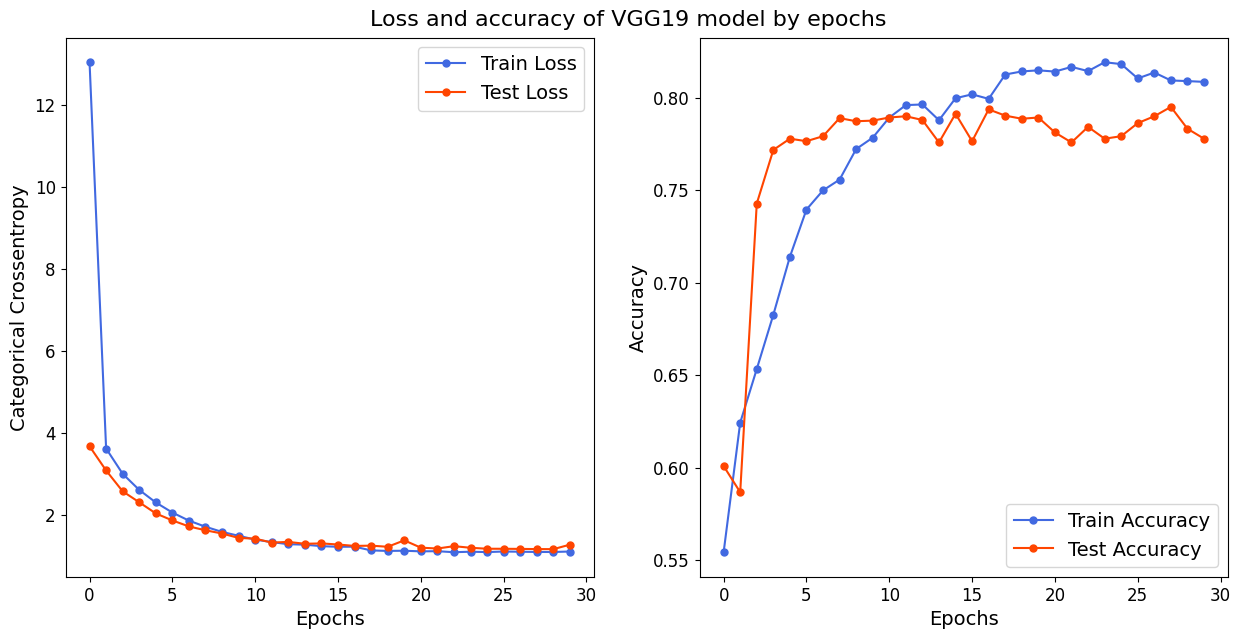

In [37]:
fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Loss and accuracy of VGG19 model by epochs", fontsize=16)

In [38]:
model_score = model.evaluate(val_dataset, verbose=1)

47/47 [==============================] - 15s 323ms/step - loss: 1.2688 - accuracy: 0.7778


## Confusion matrix

In [39]:
final_pred = model.predict(val_dataset)
final_pred = final_pred.argmax(axis=-1)

47/47 [==============================] - 16s 346ms/step


In [40]:
conf_mat = confusion_matrix(y_val, final_pred)
conf_mat

array([[1612,  163,    0,    0,    0,    0,    0],
       [ 262,  695,    0,    0,    0,    0,    0],
       [  11,   44,    0,    0,    1,    0,    0],
       [  13,   64,    0,    0,    0,    0,    0],
       [  26,   37,    0,    0,    0,    0,    0],
       [  11,   10,    0,    0,    0,    0,    0],
       [   4,   13,    0,    0,    0,    0,    0]])

In [41]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', export_as='confusion_matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True labels', fontsize=14)
    plt.xlabel('Predicted labels', fontsize=14)

Normalized confusion matrix


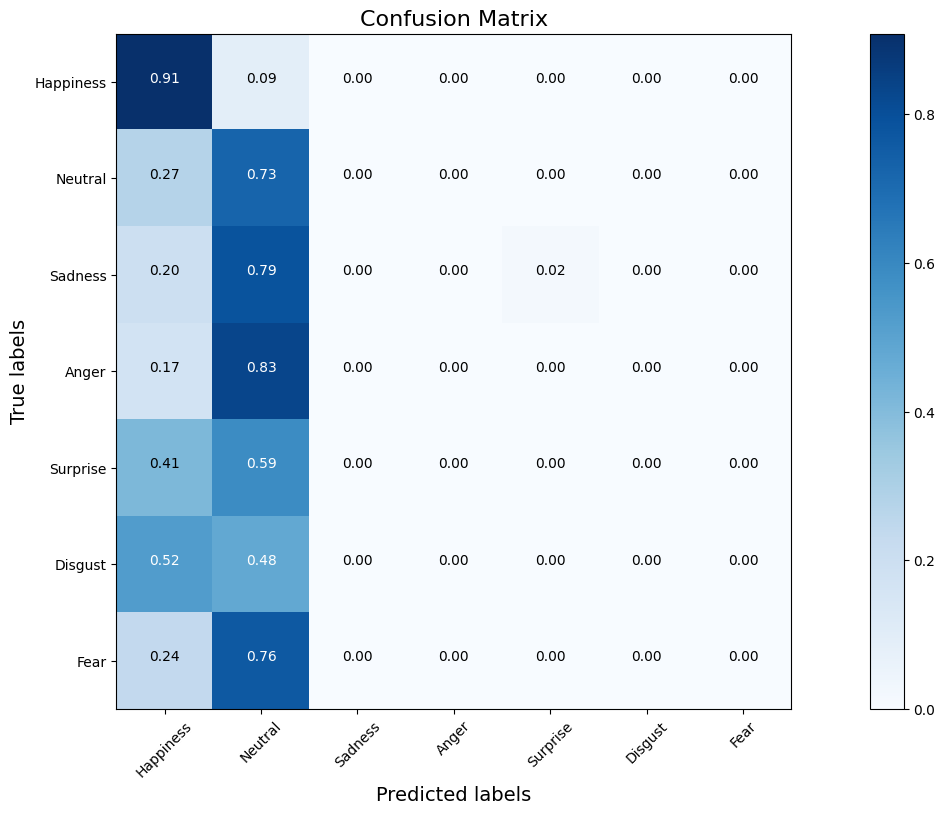

In [42]:
# Plotting the confusion matrix using the function defined above.

cm_plot_labels = ['Happiness', 'Neutral', 'Sadness', 'Anger', 'Surprise', 'Disgust', 'Fear']

plt.figure(figsize=(16,8))
plot_confusion_matrix(conf_mat, cm_plot_labels, normalize=True,
                      title="Confusion Matrix",
                      export_as="final_cnn_conf_mat_norm"
                     )

plt.show()

# Predict

In [ ]:
from keras.models import load_model

In [ ]:
age_export_dir ='/content/drive/MyDrive/AI_HACKATHON_NEWBEES/Log_Output/age_model/age_model_checkpoint.h5'
gender_export_dir ='/content/drive/MyDrive/AI_HACKATHON_NEWBEES/Log_Output/gender_model/gender_model_checkpoint.h5'
race_export_dir ='/content/drive/MyDrive/AI_HACKATHON_NEWBEES/Log_Output/race_model/race_model_checkpoint_v2.h5'

age_model = load_model(age_export_dir)
gender_model = load_model(gender_export_dir)
race_model = load_model(race_export_dir)

# summarize model.
#age_model.summary()

In [ ]:
age_ranges = ['Baby', 'Kid', 'Teenager', '20-30s', '40-50s', 'Senior']
gender_ranges = ['Male', 'Female']
race_ranges = ['Caucasian', 'Mongoloid', 'Negroid']

In [ ]:
import math
from typing import Union
from PIL import Image

def findEuclideanDistance(
    source_representation: Union[np.ndarray, list], test_representation: Union[np.ndarray, list]
) -> float:
    """
    Find euclidean distance between 2 vectors
    Args:
        source_representation (numpy array or list)
        test_representation (numpy array or list)
    Returns
        distance
    """
    if isinstance(source_representation, list):
        source_representation = np.array(source_representation)

    if isinstance(test_representation, list):
        test_representation = np.array(test_representation)

    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

def alignment_procedure(img: np.ndarray, left_eye: tuple, right_eye: tuple, nose: tuple):
    """
    Alignma given face with respect to the left and right eye coordinates.
    Left eye is the eye appearing on the left (right eye of the person). Left top point is (0, 0)
    Args:
        img (numpy array): given image
        left_eye (tuple): left eye coordinates.
            Left eye is appearing on the left of image (right eye of the person)
        right_eye (tuple): right eye coordinates.
            Right eye is appearing on the right of image (left eye of the person)
        nose (tuple): coordinates of nose
    """

    left_eye_x, left_eye_y = left_eye
    right_eye_x, right_eye_y = right_eye

    # -----------------------
    # find rotation direction
    if left_eye_y > right_eye_y:
        point_3rd = (right_eye_x, left_eye_y)
        direction = -1  # rotate same direction to clock
    else:
        point_3rd = (left_eye_x, right_eye_y)
        direction = 1  # rotate inverse direction of clock

    # -----------------------
    # find length of triangle edges

    a = findEuclideanDistance(np.array(left_eye), np.array(point_3rd))
    b = findEuclideanDistance(np.array(right_eye), np.array(point_3rd))
    c = findEuclideanDistance(np.array(right_eye), np.array(left_eye))

    # -----------------------
    # apply cosine rule
    if b != 0 and c != 0:  # this multiplication causes division by zero in cos_a calculation

        cos_a = (b * b + c * c - a * a) / (2 * b * c)

        # PR15: While mathematically cos_a must be within the closed range [-1.0, 1.0],
        # floating point errors would produce cases violating this
        # In fact, we did come across a case where cos_a took the value 1.0000000169176173
        # which lead to a NaN from the following np.arccos step
        cos_a = min(1.0, max(-1.0, cos_a))

        angle = np.arccos(cos_a)  # angle in radian
        angle = (angle * 180) / math.pi  # radian to degree

        # -----------------------
        # rotate base image

        if direction == -1:
            angle = 90 - angle

        img = Image.fromarray(img)
        img = np.array(img.rotate(direction * angle))

    # -----------------------

    return img

In [ ]:
# Convert x1, y1, x2, y2 -> x, y, w, h (top left -> bottom right)
def convert_corr(bbox):
  x1, y1,x2, y2 = bbox
  return [x1, y1, x2-x1, y2-y1]

In [ ]:
def extract_insight_face(app, img):
  faces = app.get(img)
  resp = []

  expand_face_area = 2
  for face in faces:
    bbox = face['bbox']
    x = bbox[0]
    y = bbox[1]
    w = bbox[2]
    h = bbox[3]

    # expand the facial area to be extracted and stay within img.shape limits
    x1 = max(0, x - int((w * expand_face_area) / 100))  # expand left
    y1 = max(0, y - int((h * expand_face_area) / 100))  # expand top
    x2 = min(img.shape[1], w + int((w * expand_face_area) / 100))  # expand right
    y2 = min(img.shape[0], h + int((h * expand_face_area) / 100))  # expand bottom

    facial_img = img[int(y1):int(y2), int(x1):int(x2)]

    #Face alignment
    landmarks = face['kps']
    left_eye = landmarks[1]
    right_eye = landmarks[0]
    nose = landmarks[2]
    # mouth_right = landmarks["mouth_right"]
    # mouth_left = landmarks["mouth_left"]
    facial_img = alignment_procedure(facial_img, right_eye, left_eye, nose)

    result = {'facial_image': facial_img[:, :, ::-1],
            'bbox': convert_corr(bbox)}

    resp.append(result)

  return resp

In [ ]:
!pip install -U insightface
!pip install onnxruntime-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 36.5 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp310-cp310-linux_x86_64.whl size=1054130 sha256=710ff30335d7ac63f404c35484a8508d46d8102ebde43f92b4978d7111148d14
  Stored in directory: /root/.cache/pip/wheels/e3/d0/80/e3773fb8b6d1cca87ea1d33d9b1f20a223a6493c896da249b5
Successfully built insightface
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.1/157.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.6 MB/s eta 0:00:00


In [ ]:
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

app = FaceAnalysis(allowed_modules=['detection']) # enable detection model only
app.prepare(ctx_id=0, det_size=(640, 640))

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:10<00:00, 28023.40KB/s]


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition
set det-size: (640, 640)


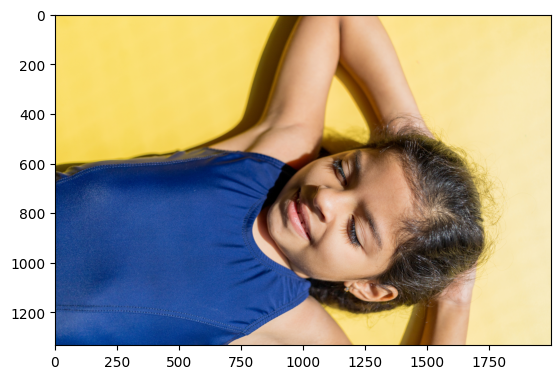

In [ ]:
img_path = "/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_raw/data/102672611.jpg"
test_img = cv2.imread(img_path)
plt.imshow(test_img[:, :, ::-1])

In [ ]:
result = extract_insight_face(app, test_img)
#result = extract_mtcnn(app, test_img)
#result

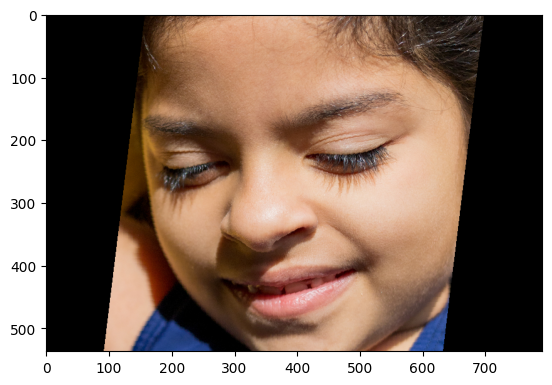

In [ ]:
agr_test_img = result[0]['facial_image']
plt.imshow(agr_test_img)

In [ ]:
agr_test_img = cv2.resize(agr_test_img, (256,256))
agr_input = agr_test_img.reshape(-1, 256, 256, 3)

print(agr_input.shape)

#gender_input = agr_test_img.reshape(-1, 256, 256, 1)

output_age = age_ranges[np.argmax(age_model.predict(agr_input))]
output_gender = gender_ranges[np.argmax(gender_model.predict(agr_input))]
output_race = race_ranges[np.argmax(race_model.predict(agr_input))]

(1, 256, 256, 3)
1/1 [==============================] - 1s 803ms/step


In [ ]:
print(f'Age: {output_age} \nGender: {output_gender} \nRace: {output_race}')

Age: 20-30s 
Gender: Female 
Race: Caucasian


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os

folder_path = '/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_raw/public_test/'

images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict_classes(images, batch_size=10)
print(classes)